In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using PhasorNetworks
using Plots
using Random: Xoshiro, AbstractRNG

Precompiling PhasorNetworks
  ✓ LuxDeviceUtils → LuxDeviceUtilsRecursiveArrayToolsExt
  ✓ SciMLBase
  ✓ ComponentArrays → ComponentArraysSciMLBaseExt
  ✓ SciMLBase → SciMLBaseZygoteExt
  ✓ SciMLBase → SciMLBasePartialFunctionsExt
  ✓ DiffEqBase
  ✓ DiffEqBase → DiffEqBaseUnitfulExt
  ✓ DiffEqBase → DiffEqBaseEnzymeExt
  ✓ DiffEqBase → DiffEqBaseDistributionsExt
  ✓ DiffEqBase → DiffEqBaseTrackerExt
  ✓ DiffEqBase → DiffEqBaseReverseDiffExt
  ✓ DiffEqNoiseProcess
  ✓ JumpProcesses
  ✓ LinearSolve
  ✓ JumpProcesses → JumpProcessFastBroadcastExt
  ✓ DiffEqNoiseProcess → DiffEqNoiseProcessReverseDiffExt
  ✓ Sundials
  ✓ LinearSolve → LinearSolveEnzymeExt
  ✓ LinearSolve → LinearSolveFastAlmostBandedMatricesExt
  ✓ LinearSolve → LinearSolveKernelAbstractionsExt
  ✓ SimpleNonlinearSolve
  ✓ SimpleNonlinearSolve → SimpleNonlinearSolveStaticArraysExt
  ✓ SimpleNonlinearSolve → SimpleNonlinearSolveZygoteExt
  ✓ SimpleNonlinearSolve → SimpleNonlinearSolveReverseDiffExt
  ✓ SimpleNonlinearSolve →

In [3]:
include("resonator.jl")

check (generic function with 1 method)

In [4]:
n_cb = 20
n_vsa = 1024

1024

In [5]:
rng0 = Xoshiro(42)

Xoshiro(0xa379de7eeeb2a4e8, 0x953dccb6b532b3af, 0xf597b8ff8cfd652a, 0xccd7337c571680d1, 0xc90c4a0730db3f7e)

In [6]:
X_cb = random_symbols((n_cb, n_vsa), rng0)
Y_cb = random_symbols((n_cb, n_vsa), rng0)
Z_cb = random_symbols((n_cb, n_vsa), rng0);

In [7]:
fac_i, fac, sym = generate_composition(rng0, X_cb, Y_cb, Z_cb)

([1, 16, 19], [-0.0910341739654541 0.18797945976257324 … 0.06673598289489746 0.2970832586288452; -0.3065168857574463 -0.016473770141601562 … -0.09602761268615723 -0.8534413576126099; -0.1334984302520752 0.23561692237854004 … -0.2857959270477295 0.26616859436035156], [-0.5310494899749756 0.4071226119995117 … -0.31508755683898926 -0.2901895046234131])

In [8]:
fac

3×1024 Matrix{Float64}:
 -0.0910342   0.187979    0.187316   …   0.672841   0.066736    0.297083
 -0.306517   -0.0164738   0.0870019     -0.92451   -0.0960276  -0.853441
 -0.133498    0.235617   -0.430766       0.27169   -0.285796    0.266169

In [9]:
sym

1×1024 Matrix{Float64}:
 -0.531049  0.407123  -0.156448  0.278131  …  0.0200207  -0.315088  -0.29019

In [10]:
chk1 = similarity_outer(sym, X_cb, dims=1);

In [11]:
chk2 = similarity_outer(sym, Y_cb, dims=1);

In [12]:
chk3 = similarity_outer(sym, Z_cb, dims=1);

In [13]:
chk3

1×1×20 Array{Float64, 3}:
[:, :, 1] =
 -0.018858982033482827

[:, :, 2] =
 0.037904002781634326

[:, :, 3] =
 0.0013569636489638508

;;; … 

[:, :, 18] =
 0.006233140288371793

[:, :, 19] =
 0.022393293394837095

[:, :, 20] =
 -0.019569353265347016

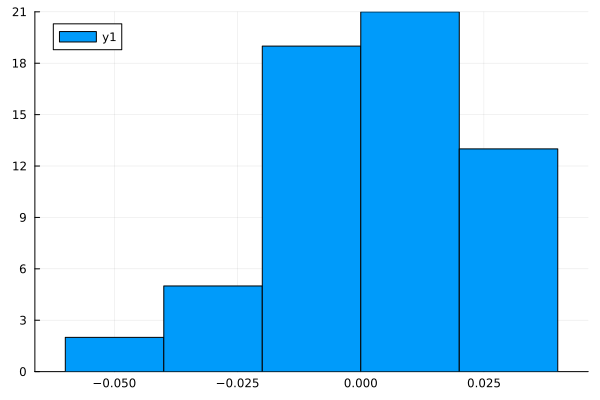

In [14]:
histogram(cat(chk1, chk2, chk3, dims=1)|> vec)

In [15]:
fac |> size

(3, 1024)

In [16]:
xx = v_unbind(sym, v_bind(fac[3:3,:],fac[2:2,:]))

1×1024 Matrix{Float64}:
 -0.0910342  0.187979  0.187316  0.648125  …  0.672841  0.066736  0.297083

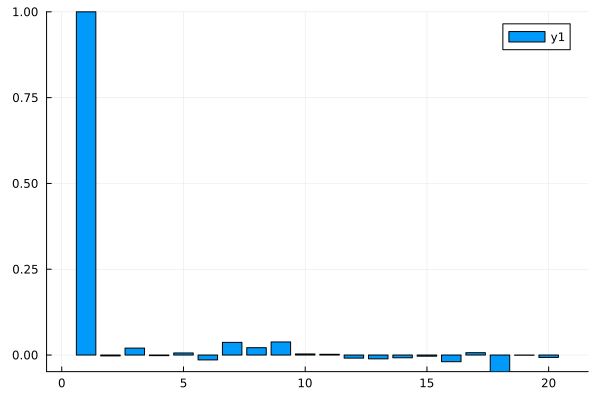

In [17]:
bar(similarity_outer(xx, X_cb, dims=1) |> vec)

In [18]:
yy = v_unbind(sym, v_bind(fac[1:1,:], fac[3:3,:]))

1×1024 Matrix{Float64}:
 -0.306517  -0.0164738  0.0870019  …  -0.92451  -0.0960276  -0.853441

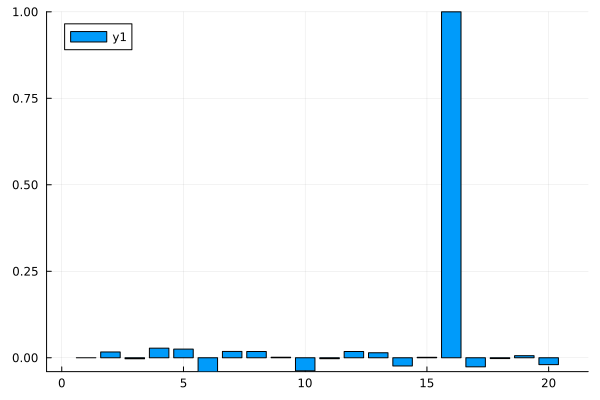

In [19]:
bar(similarity_outer(yy, Y_cb, dims=1) |> vec)

In [20]:
zz = v_unbind(sym, v_bind(fac[1:1,:], fac[2:2,:]))

1×1024 Matrix{Float64}:
 -0.133498  0.235617  -0.430766  0.381202  …  0.27169  -0.285796  0.266169

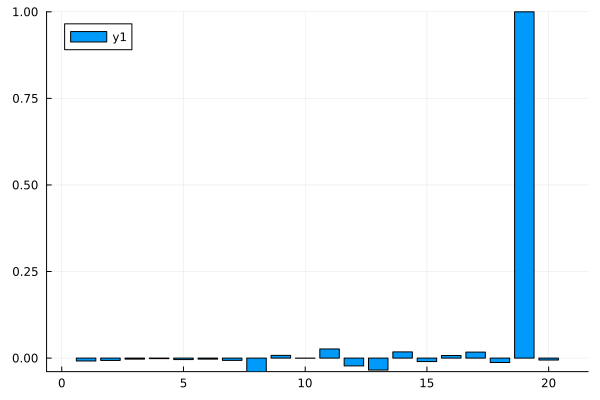

In [21]:
bar(similarity_outer(zz, Z_cb, dims=1) |> vec)

In [22]:
x_cb, y_cb, z_cb = initialize_guesses(X_cb, Y_cb, Z_cb)

3-element Vector{Matrix{Float64}}:
 [-0.3590450331537608 -0.12601368849529404 … -0.007139724235720468 0.29186573919248443]
 [0.755667336520337 0.8475005839653564 … 0.4821915168463748 -0.30048840957188777]
 [0.13805197132714905 -0.7830481773267493 … -0.2737929510652372 -0.4138172421881136]

In [23]:
xg = refine(sym, X_cb, cat(y_cb, z_cb, dims=1))

1×1024 Matrix{Float64}:
 -0.224989  -0.00573147  0.355968  …  -0.366128  -0.0891096  0.38842

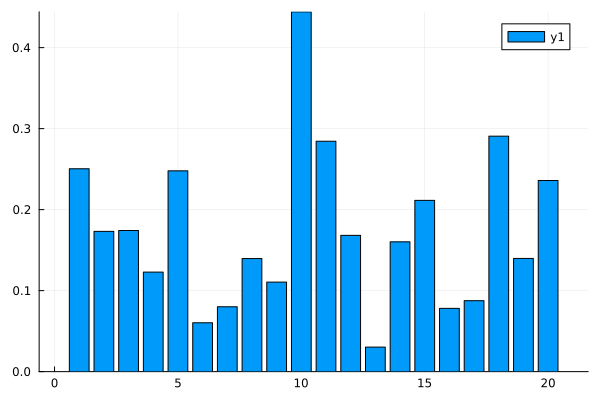

In [24]:
bar(similarity_outer(X_cb, xg, dims=1) |> vec)

In [25]:
g = resonate(sym, 10, X_cb, Y_cb, Z_cb)

11-element Vector{Matrix{Float64}}:
 [-0.3590450331537608 -0.12601368849529404 … -0.007139724235720468 0.29186573919248443; 0.755667336520337 0.8475005839653564 … 0.4821915168463748 -0.30048840957188777; 0.13805197132714905 -0.7830481773267493 … -0.2737929510652372 -0.4138172421881136]
 [-0.22498925255682914 -0.005731470698575505 … -0.08910962374342736 0.3884202045420752; -0.21442589181839747 0.7097062593520846 … 0.19670196208867793 -0.9955163931144438; -0.09876699644183899 -0.7647501432283433 … -0.20907748439223928 -0.577777465718998]
 [-0.1264828198071983 0.07466594787555163 … 0.05811352863238531 0.3004785539604545; -0.1391321996524247 0.8093034883652709 … 0.39085692482324746 -0.8090048534153216; -0.0829867172698175 -0.10078372420213702 … -0.1862560434136465 -0.2384862979404441]
 [-0.12467354553057014 0.18381356054455486 … 0.07311741555965201 0.3146525979839287; -0.294294487617631 0.011556165286848349 … -0.05129362317551217 -0.8603098416873485; -0.07123383600300148 0.2810232104563681

In [26]:
xmapfn = x -> vec(similarity_outer(x[1:1,:], X_cb, dims=1))

#20 (generic function with 1 method)

In [27]:
ymapfn = x -> vec(similarity_outer(x[2:2,:], Y_cb, dims=1))

#22 (generic function with 1 method)

In [28]:
zmapfn = x -> vec(similarity_outer(x[3:3,:], Z_cb, dims=1))

#24 (generic function with 1 method)

In [29]:
xsims = cat(collect(map(xmapfn, g))..., dims=2);

In [30]:
ysims = cat(collect(map(ymapfn, g))..., dims=2);

In [31]:
zsims = cat(collect(map(zmapfn, g))..., dims=2);

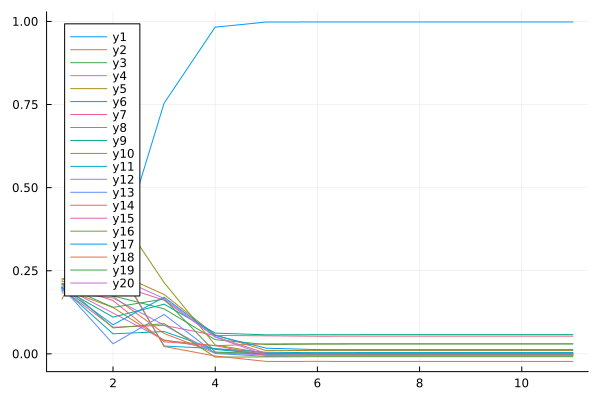

In [32]:
plot(xsims')

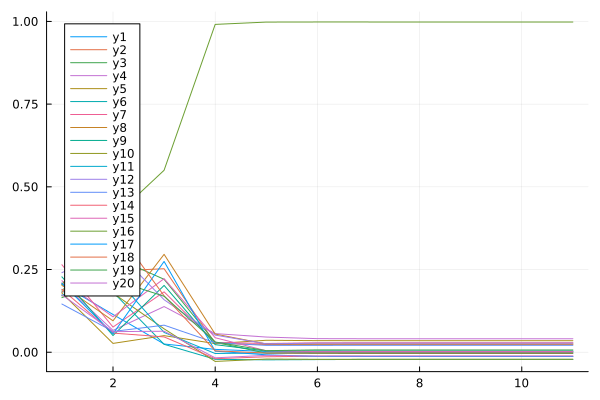

In [33]:
plot(ysims')

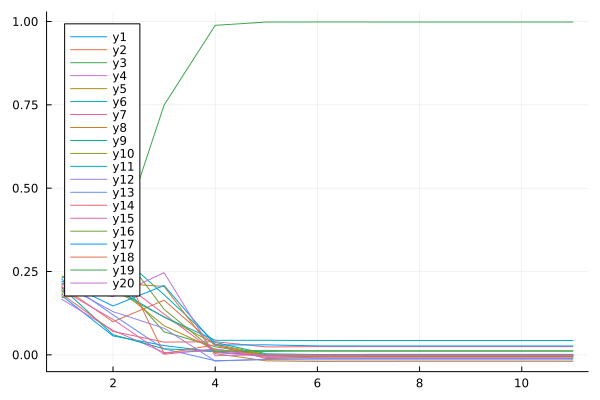

In [34]:
plot(zsims')

In [35]:
size(zsims)

(20, 11)

In [36]:
allsims = stack((xsims, ysims, zsims), dims=1)

3×20×11 Array{Float64, 3}:
[:, :, 1] =
 0.199841  0.219009  0.191229  0.202729  …  0.221977  0.208147  0.187654
 0.205025  0.207967  0.18783   0.209424     0.180864  0.16502   0.173701
 0.177269  0.204768  0.189124  0.16645      0.208443  0.197647  0.202274

[:, :, 2] =
 0.250465   0.173156   0.174267  0.122852   …  0.290691  0.139766  0.235979
 0.114045   0.245416   0.288719  0.0660061     0.383233  0.219376  0.0622408
 0.0568475  0.0994433  0.240552  0.0734527     0.318032  0.285737  0.174631

[:, :, 3] =
 0.754027   0.0612679  0.135464   …  0.0220944   0.165029  0.166316
 0.0248609  0.252362   0.220411      0.17055     0.169106  0.0634379
 0.0277651  0.163895   0.0691184     0.00380794  0.749412  0.246638

;;; … 

[:, :, 9] =
  0.998211    -0.000212694   0.0295223   …  -0.00058556  -0.00402419
  0.00243569   0.0239705    -0.00387866      0.00685999  -0.0115094
 -0.00510911  -0.00246459   -0.00472918      0.99857     -0.000485575

[:, :, 10] =
  0.998211    -0.000212763   0.0295221  

In [37]:
function extract_trends(factor, sims)
    n = size(sims,1)
    others = setdiff(1:n, factor)

    correct = sims[factor,:]
    incorrect = sims[others,:]

    return correct, incorrect
end

extract_trends (generic function with 1 method)

In [38]:
xc, xi = extract_trends(fac_i[1], xsims)

([0.19984073179230138, 0.2504650937760662, 0.7540271225904208, 0.9827731327027655, 0.9981468864685273, 0.9982167884588194, 0.9982091364867977, 0.998210891587593, 0.9982108634603516, 0.9982108493402686, 0.9982108475538681], [0.2190089721013357 0.17315631463510117 … -0.00021276301958198646 -0.0002127761134026523; 0.1912290654741543 0.1742673455532245 … 0.02952207703591462 0.0295221066139018; … ; 0.20814744858631876 0.13976634754494335 … -0.0005859864969301259 -0.0005860137877295714; 0.18765365368475348 0.23597929886327637 … -0.004024600233558529 -0.004024656823193798])

In [39]:
xc

11-element Vector{Float64}:
 0.19984073179230138
 0.2504650937760662
 0.7540271225904208
 0.9827731327027655
 0.9981468864685273
 0.9982167884588194
 0.9982091364867977
 0.998210891587593
 0.9982108634603516
 0.9982108493402686
 0.9982108475538681

In [40]:
stack((xc, xc), dims=1)

2×11 Matrix{Float64}:
 0.199841  0.250465  0.754027  0.982773  …  0.998211  0.998211  0.998211
 0.199841  0.250465  0.754027  0.982773     0.998211  0.998211  0.998211

In [41]:
xi

19×11 Matrix{Float64}:
 0.219009  0.173156   0.0612679   0.00223352  …  -0.000212763  -0.000212776
 0.191229  0.174267   0.135464    0.0428406       0.0295221     0.0295221
 0.202729  0.122852   0.0419702   0.0152816      -0.00029889   -0.000298926
 0.225763  0.247865   0.178581    0.0569974       0.0103185     0.0103185
 0.198135  0.0602961  0.0672378   0.013441       -0.00341193   -0.00341191
 0.195093  0.0800527  0.085595    0.0554454   …   0.0532055     0.0532055
 0.195906  0.139574   0.0403794   0.024475        0.030849      0.030849
 0.198169  0.110477   0.149487    0.0624119       0.0577553     0.0577553
 0.164739  0.444237   0.214357    0.0265536       0.00220442    0.00220443
 0.209566  0.284427   0.0236056   0.0158469       0.00386229    0.00386235
 0.183733  0.168238   0.0862568   0.00279474  …  -0.00322213   -0.00322211
 0.200374  0.0302862  0.11861     0.00109331     -0.00655786   -0.00655789
 0.210783  0.160265   0.0363068   0.0248404      -0.00300526   -0.00300531
 0.193

In [42]:
function extract_all_trends(factors, sims...)
    results = [extract_trends(factors[i], sims[i]) for i in 1:length(sims)]
    correct = stack([r[1] for r in results], dims=1)
    incorrect = cat([r[2] for r in results]..., dims=1)
    return correct, incorrect
end

extract_all_trends (generic function with 1 method)

In [43]:
all_c, all_i = extract_all_trends(fac_i, xsims, ysims, zsims)

([0.19984073179230138 0.2504650937760662 … 0.9982108493402686 0.9982108475538681; 0.204295528081631 0.40532831958587295 … 0.9982648979459972 0.9982648964055038; 0.19764730037213357 0.2857369448971697 … 0.9985700869872575 0.9985700834312569], [0.2190089721013357 0.17315631463510117 … -0.00021276301958198646 -0.0002127761134026523; 0.1912290654741543 0.1742673455532245 … 0.02952207703591462 0.0295221066139018; … ; 0.20844325626081744 0.31803204107296995 … -0.006737520676144008 -0.00673748409530391; 0.2022735797434262 0.17463051263495424 … -0.00048557000594278994 -0.00048554613458897875])

In [44]:
all_c |> size

(3, 11)

In [45]:
all_i |> size

(57, 11)

In [46]:
function check(factors, sims...)
    function inner(factor, sim)
        return factor == argmax(sim[:,end]) ? true : false
    end

    correct = [inner(factors[i], sims[i]) for i in 1:length(sims)]
    return correct
end

check (generic function with 1 method)

In [47]:
check(fac_i, xsims, ysims, zsims)

3-element Vector{Bool}:
 1
 1
 1

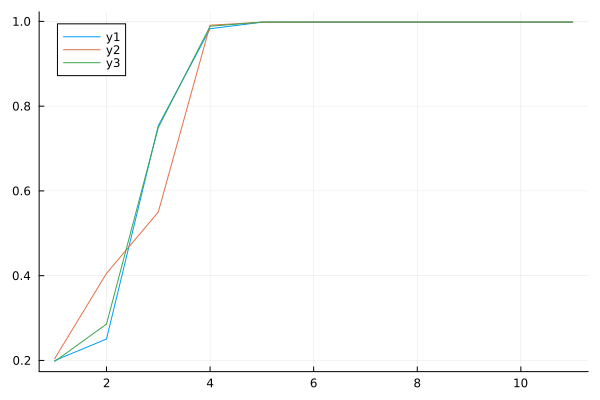

In [48]:
plot(all_c')

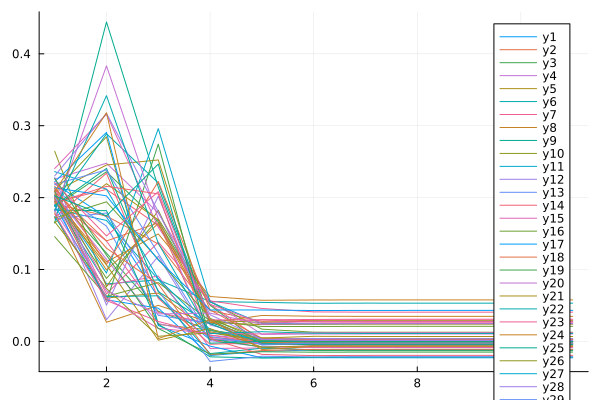

In [49]:
plot(all_i')

In [50]:
fac_i

3-element Vector{Int64}:
  1
 16
 19

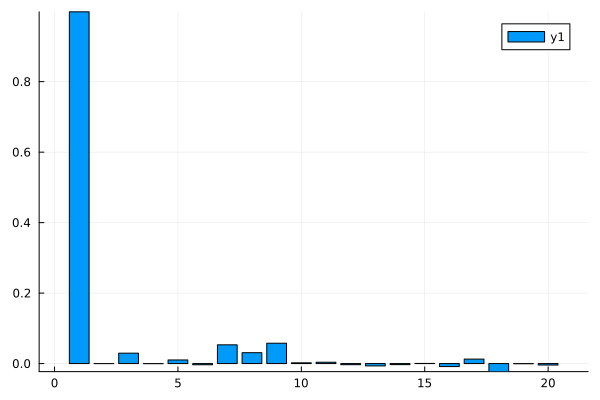

In [51]:
bar(similarity_outer(g[end][1:1,:], X_cb, dims=1) |> vec)

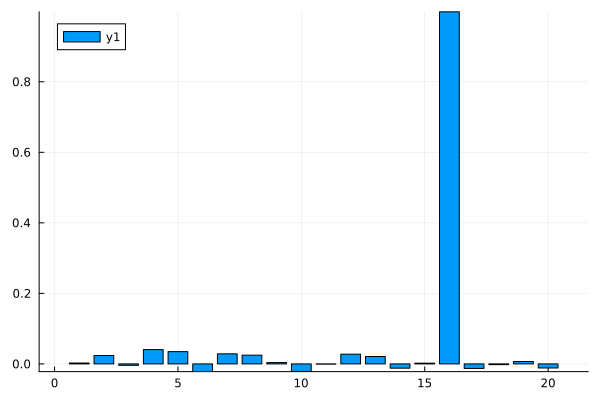

In [52]:
bar(similarity_outer(g[end][2:2,:], Y_cb, dims=1) |> vec)

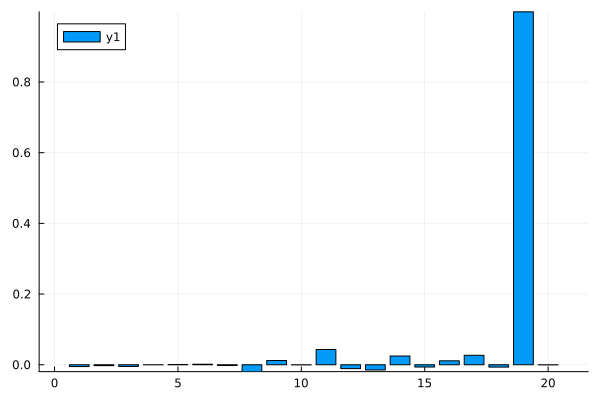

In [53]:
bar(similarity_outer(g[end][3:3,:], Z_cb, dims=1) |> vec)

In [54]:
rng0

Xoshiro(0xe5c3104c70b513e3, 0x459b2b2b627f8269, 0xda8dfa6c056cb4ee, 0xc0f95e7204032f33, 0xc90c4a0730db3f7e)

In [55]:
function factor3_test(rng::AbstractRNG, n_iters::Int)
    #generate the codebooks and composition given the rng
    X_cb = random_symbols((n_cb, n_vsa), rng)
    Y_cb = random_symbols((n_cb, n_vsa), rng)
    Z_cb = random_symbols((n_cb, n_vsa), rng)
    fac_i, fac, sym = generate_composition(rng, X_cb, Y_cb, Z_cb)
    
    #initialize the guesses
    x_cb, y_cb, z_cb = initialize_guesses(X_cb, Y_cb, Z_cb)
    #resonate the factors
    g = resonate(sym, n_iters, X_cb, Y_cb, Z_cb)

    #measure the result's similarity to the original symbols
    xmapfn = x -> vec(similarity_outer(x[1:1,:], X_cb, dims=1))
    ymapfn = x -> vec(similarity_outer(x[2:2,:], Y_cb, dims=1))
    zmapfn = x -> vec(similarity_outer(x[3:3,:], Z_cb, dims=1))
    
    xsims = cat(collect(map(xmapfn, g))..., dims=2)
    ysims = cat(collect(map(ymapfn, g))..., dims=2)
    zsims = cat(collect(map(zmapfn, g))..., dims=2)

    #check the correctness of the resonated factors
    acc = check(fac_i, xsims, ysims, zsims)
    trends = extract_all_trends(fac_i, xsims, ysims, zsims)

    return acc, trends
        
end

factor3_test (generic function with 1 method)

In [56]:
experiment = [factor3_test(rng0, 20) for i in 1:1000];

In [57]:
using Base.Iterators: flatten

In [58]:
accuracies = cat([e[1] for e in experiment],  dims=1) |> flatten |> collect

3000-element Vector{Bool}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [59]:
using Statistics: mean

In [60]:
mean(accuracies)

0.9833333333333333

In [61]:
using RecursiveArrayTools

In [62]:
pos_trends = stack([e[2][1] for e in experiment], dims=1)

1000×3×21 Array{Float64, 3}:
[:, :, 1] =
 0.191462  0.163048  0.217741
 0.19962   0.191558  0.203892
 0.199048  0.218363  0.229928
 0.197859  0.242845  0.251877
 0.190492  0.195704  0.190195
 0.215992  0.185864  0.22131
 0.20083   0.191592  0.210418
 0.19508   0.221984  0.203645
 0.181254  0.205519  0.215696
 0.184777  0.165558  0.20472
 0.227677  0.195236  0.194611
 0.183781  0.198858  0.179388
 0.162785  0.191705  0.194323
 ⋮                   
 0.196139  0.189059  0.192452
 0.186855  0.176306  0.214268
 0.164998  0.175373  0.198217
 0.198783  0.214874  0.13079
 0.174283  0.202912  0.189871
 0.214235  0.200343  0.180248
 0.205731  0.180693  0.220574
 0.152971  0.200647  0.173163
 0.198156  0.218586  0.221461
 0.193917  0.221847  0.183442
 0.233884  0.211595  0.189942
 0.21002   0.187078  0.18647

[:, :, 2] =
 0.479714   0.00343564  0.229901
 0.380658   0.11836     0.120621
 0.456424   0.182063    0.526773
 0.624482   0.65011     0.52815
 0.379299   0.0584736   0.202832
 0.384498   0.

In [63]:
pt2 = reshape(collect(flatten(pos_trends)), (3000, 21))

3000×21 Matrix{Float64}:
 0.191462  0.479714   0.115926    0.640581  …  0.998482  0.998482  0.998482
 0.19962   0.380658   0.0526016   0.844017     0.998031  0.998031  0.998031
 0.199048  0.456424   0.726502    0.993241     0.997873  0.997873  0.997873
 0.197859  0.624482   0.982253    0.996738     0.996976  0.996976  0.996976
 0.190492  0.379299   0.112154    0.426513     0.997853  0.997853  0.997853
 0.215992  0.384498   0.150407    0.108664  …  0.998697  0.998697  0.998697
 0.20083   0.301748   0.19497     0.972412     0.995737  0.995737  0.995737
 0.19508   0.264836   0.5987      0.981242     0.998388  0.998388  0.998388
 0.181254  0.01649    0.482271    0.10336      0.998397  0.998397  0.998397
 0.184777  0.0658252  0.572707    0.442239     0.997034  0.997034  0.997034
 0.227677  0.337674   0.965411    0.995021  …  0.997242  0.997242  0.997242
 0.183781  0.577712   0.69566     0.996258     0.996261  0.996261  0.996261
 0.162785  0.391386   0.684401    0.99622      0.996089  0.9960

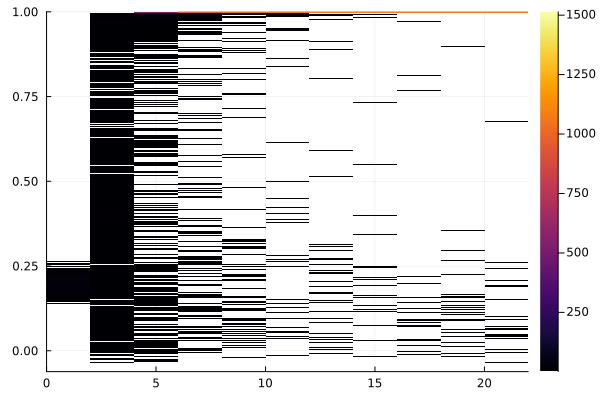

In [66]:
histogram2d(repeat(collect(1:21), 3000), pt2' |> vec)

In [67]:
neg_trends = stack([e[2][2] for e in experiment], dims=1)

1000×57×21 Array{Float64, 3}:
[:, :, 1] =
 0.202832  0.216891  0.18971   0.198281  …  0.157297  0.232195  0.209095
 0.203976  0.219192  0.164243  0.169352     0.182036  0.213263  0.180035
 0.217036  0.145514  0.238708  0.23935      0.208881  0.203984  0.173819
 0.195755  0.182835  0.19564   0.18662      0.220696  0.210308  0.214136
 0.194021  0.256406  0.168381  0.214029     0.1775    0.226219  0.208816
 0.210394  0.193284  0.211473  0.179605  …  0.198742  0.208962  0.207276
 0.23189   0.229773  0.231956  0.168095     0.180183  0.207459  0.202056
 0.194362  0.211623  0.192961  0.171227     0.172601  0.187171  0.198349
 0.187748  0.218677  0.188554  0.252127     0.22667   0.21414   0.207942
 0.193705  0.190163  0.195336  0.201307     0.207951  0.223896  0.183549
 0.244075  0.177799  0.194945  0.193764  …  0.18917   0.200519  0.219815
 0.240393  0.184804  0.183818  0.196948     0.179681  0.185786  0.185607
 0.201233  0.18207   0.169583  0.226592     0.156201  0.199078  0.224806
 ⋮       

In [69]:
nt2 = reshape(collect(flatten(neg_trends)), (1000*57, 21))

57000×21 Matrix{Float64}:
 0.202832  0.0612663   0.195981     0.0970808   …   0.00972386    0.00972386
 0.203976  0.379038    0.176203     0.209832        0.000694172   0.000694172
 0.217036  0.180398    0.0735505    0.00396851      0.000515637   0.000515637
 0.195755  0.0384332   0.00700594  -0.0115553      -0.0118255    -0.0118255
 0.194021  0.163116    0.317386     0.12213        -0.00314158   -0.00314158
 0.210394  0.0585165   0.105795     0.0426804   …   0.0288935     0.0288935
 0.23189   0.0562474   0.111995     0.0515179       0.0649914     0.0649914
 0.194362  0.396898    0.0282568    0.0396866       0.0674613     0.0674613
 0.187748  0.300568    0.229577     0.334349       -0.00643957   -0.00643957
 0.193705  0.116153   -0.0135755    0.0134222      -0.0172       -0.0172
 0.244075  0.263303    0.108125     0.0808983   …   0.0766859     0.0766859
 0.240393  0.0650561   0.0866594   -0.00982091     -0.0122729    -0.0122729
 0.201233  0.111026    0.105099     0.0278535       0.0128

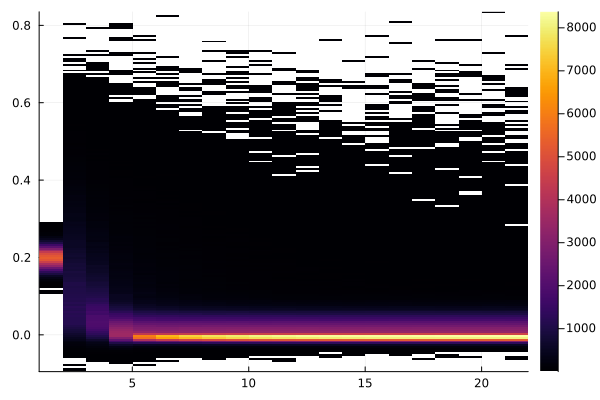

In [70]:
histogram2d(repeat(collect(1:21), 57000), nt2' |> vec)

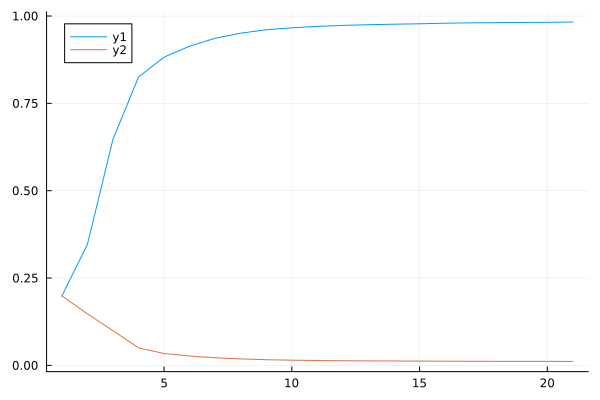

In [76]:
plot(mean(pt2, dims=1)')
plot!(mean(nt2, dims=1)')